First I needed to install the pybind package for python and for c++ to use:
```
pip install pybind11
sudo apt-get install pybind11-dev
sudo apt-install Jupyter-core
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension enable --py --sys-prefix ipympl
sudo apt-get install ffmpeg

```


In [1]:
import sys
import os
library_path = os.path.abspath("../cplusplus")
if library_path not in sys.path:
    sys.path.append(library_path)
import Orbit_Sim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
# from IPython.display import Video

def Basic_Graphic(data,size):
    y_values = np.array(data[1])
    # Static Plot
    # plt.clf()
    plt.figure( figsize=(5,5) )

    current = int(len(y_values[0])/2)

    x_vals = []
    y_vals = []
    for x in range(size):
        x_val = y_values[:,current]
        x_vals.append(x_val)
        y_val = y_values[:,current+1]
        y_vals.append(y_val)
        plt.plot( x_val , y_val , label = 'orbit #' + str(x+1) )
        current += 3

    plt.legend()
    plt.grid()
    plt.axis('equal')
    plt.show()

# Moving Plot
def Animated_Graph(data,size,xl,xu,yl,yu,seconds = 8,lagtime = 0,name = ""):
    
    fig, ax = plt.subplots()
    y_values = np.array(data[1])

    current = int(len(y_values[0])/2)
    print(len(y_values))
    x_vals = []
    y_vals = []
    for x in range(size):
        x_val = y_values[:,current]
        x_vals.append(x_val)
        y_val = y_values[:,current+1]
        y_vals.append(y_val)
        current += 3
    line_orbits = []
    for i in range(size):
        line_orbit, = ax.plot( x_vals[i][0] , y_vals[i][0] , label = 'orbit #' + str(i+1) )
        # print(len(x_vals[i]))
        line_orbits.append(line_orbit)

    # print("size of x_vals:",len(x_vals))
    def animation_movie( frame ):
        # print("Frame:",frame)
        if lagtime == 0:
            for i, line in enumerate(line_orbits):
                line.set_xdata(x_vals[i][:frame])
                line.set_ydata(y_vals[i][:frame])
        else:
            for i, line in enumerate(line_orbits):
                line.set_xdata(x_vals[i][(frame - lagtime):frame])
                line.set_ydata(y_vals[i][(frame - lagtime):frame])
        return line_orbits
    # print(len(line_orbits))
    n_steps = int( len(y_values) )
    # print(n_steps)
    num_seconds_for_animation = seconds
    milliseconds_per_frame = 30

    frame_interval = int((milliseconds_per_frame*n_steps)/(1000*num_seconds_for_animation))
    print("frame interval:",frame_interval)

    animation = FuncAnimation( fig , animation_movie , frames = range(0,n_steps,frame_interval) , interval = milliseconds_per_frame , blit = True )
    
    

    # Display the animation inline
    ax.legend()
    ax.set_xlim(xl,xu)
    ax.set_ylim(yl,yu)
    
    # Save & Display the animation
    if name != "":
        if not os.path.isfile(name + '.gif'):
            animation.save("../animations/" + name + '.gif', writer='imagemagick', fps=30)
        Image(filename= "../animations/" + name + '.gif')
        
        # animation.save(name +'.mp4', writer='ffmpeg')
        # Video(name + '.mp4')
    else:# Use if you want to display an interactive widgit in-line
        %matplotlib widget

    
def Formatter(vector):
    VN = []
    RN = []
    for i in range(len(vector)):
        if (i % 2 == 0):
            RN += vector[i]
        else:
            VN += vector[i]
    return VN + RN


Look at how cool it looks animated!
![](./5_body_anim.mp4)

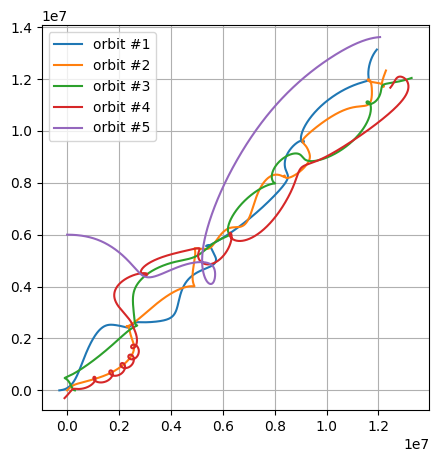

In [2]:

# G = 6.67259*10**-20

# Mass Data
masses = [10**29,10**29,10**29,10**25,10**25]

# Positional and Velocity data; Of format Rx, Vx
vectors = [
    [-300000,0,0],
    [0,0,0],
    [0,0,0],
    [250,250,0],
    [300000,0,0],
    [0,0,0],
    [-100000,-300000,0],
    [300,300,0],
    [0,6000000,0],
    [50,0,0]
]

data = Orbit_Sim.runge_kutta_system(Formatter(vectors),masses,0,150000,1,6.67259*10**-20)

# Generates a static plot of the data
Basic_Graphic(data,len(masses))

# Generates & Displays Gif Animation of the Data
# Animated_Graph(data,len(masses),-10**6,1.5*10**7,-10**6,1.5*10**7,8,0,"5_body_anim")


[0.0, 0.0, 0.0, 8.90936744039058, 28.16862242733466, -0.0005922288268305209, -12.23897241527747, 5.603781185280049, 0.2506591419204041, 0.0, 0.0, 0.0, 143179557.9215212, -47569027.33498507, 1753.005870185792, 287815514.851455, 697703381.2658194, -9337573.633872956]


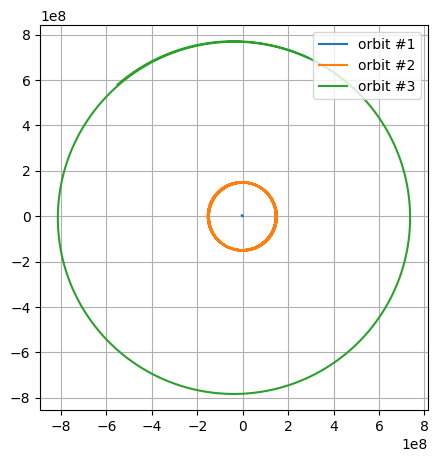

In [3]:
# # Parameters for Sun, Earth, and Jupiter
masses2 = [1.9891  * 10**30, #sun in kg
           5.97219 * 10**24, #mass of Earth in kg
           1.898   * 10**27]
# Of format Rx, Vx
vectors2 = [
    [0.0,0.0,0.0],
    [0.0,0.0,0.0],
    [ 1.431795579215212E+08,-4.756902733498507E+07,1.753005870185792E+03],
    [8.909367440390580E+00,2.816862242733466E+01,-5.922288268305209E-04],
    [2.878155148514550E+08,6.977033812658194E+08,-9.337573633872956E+06],
    [-1.223897241527747E+01,5.603781185280049E+00,2.506591419204041E-01]
]
#10.0 * 365.25 * 24 * 3600
print(Formatter(vectors2))
data2 = Orbit_Sim.runge_kutta_system(Formatter(vectors2),masses2,0.0,14 * 365.25 * 24 * 3600,3600,6.67430e-20)
Basic_Graphic(data2,len(masses2))
# Animated_Graph(data2,len(masses2),-10**9,10**9,-10**9,10**9,8,500,"Jupiter_Earth")

# Image(filename='../animations/' + 'Jupiter_Earth.gif')

In [4]:
# Now we want Earth, Moon, and Satellites:

# Lets try importing these from JPL using the appropriate library...
# pip install astroquery
from astroquery.jplhorizons import Horizons

obj = Horizons(id='Ceres', location='500@10', epochs={'start':'2024-09-10', 'stop':'2024-09-11', 'step':'1d'})
eph = obj.ephemerides()
print(eph)
print(type(eph))
print(obj.vectors())

vectors = obj.vectors()
print(np.array([vectors['x'][0], vectors['y'][0], vectors['z'][0]]) )
print(np.array([vectors['vx'][0], vectors['vy'][0], vectors['vz'][0]]))
print(vectors.info)

    targetname       datetime_str   datetime_jd ... alpha_true  PABLon  PABLat
       ---               ---             d      ...    deg       deg     deg  
----------------- ----------------- ----------- ... ---------- -------- ------
1 Ceres (A801 AA) 2024-Sep-10 00:00   2460563.5 ...     0.0032 296.6427 -6.328
1 Ceres (A801 AA) 2024-Sep-11 00:00   2460564.5 ...     0.0032 296.8313 -6.356
<class 'astropy.table.table.Table'>
    targetname    datetime_jd ...       range             range_rate     
       ---             d      ...         AU                AU / d       
----------------- ----------- ... ----------------- ---------------------
1 Ceres (A801 AA)   2460563.5 ... 2.936370463863601 0.0004876799950028467
1 Ceres (A801 AA)   2460564.5 ... 2.936857051214932 0.0004854939353664387
[ 1.3089292  -2.60848729 -0.32368178]
[ 0.00873288  0.00401701 -0.00148173]
<Table masked=True length=2>
    name      dtype   unit 
------------ ------- ------
  targetname   str17    ---
 datetime_

{'Sun': {'position': array([0., 0., 0.]), 'velocity': array([0., 0., 0.])}, 'Earth': {'position': array([ 7.42614398e+07,  1.27740447e+08, -7.93733983e+03]), 'velocity': array([-2.62301379e+01,  1.48673061e+01, -2.17720676e-06])}, 'Jupiter': {'position': array([ 2.02405699e+08,  7.30874133e+08, -7.56449103e+06]), 'velocity': array([-12.75490719,   4.10488017,   0.26829708])}, 'Ceres': {'position': array([ 2.84212950e+08, -3.34851139e+08, -6.29557661e+07]), 'velocity': array([12.77786212, 10.49735354, -2.02189783])}, 'Mars': {'position': array([1.02130856e+06, 2.34677048e+08, 4.89263323e+06]), 'velocity': array([-23.31377832,   2.1640376 ,   0.61712463])}, 'Venus': {'position': array([ 1.05954732e+08, -2.38743314e+07, -6.44156643e+06]), 'velocity': array([7.52392349e+00, 3.40072243e+01, 3.29091602e-02])}, 'Mercury': {'position': array([53563034.87531161, -4485939.82702638, -5279495.44304319]), 'velocity': array([-5.35132588, 50.72133344,  4.63586101])}}


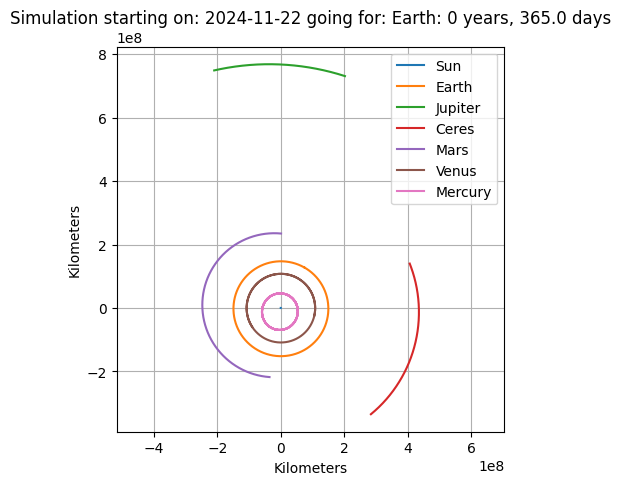

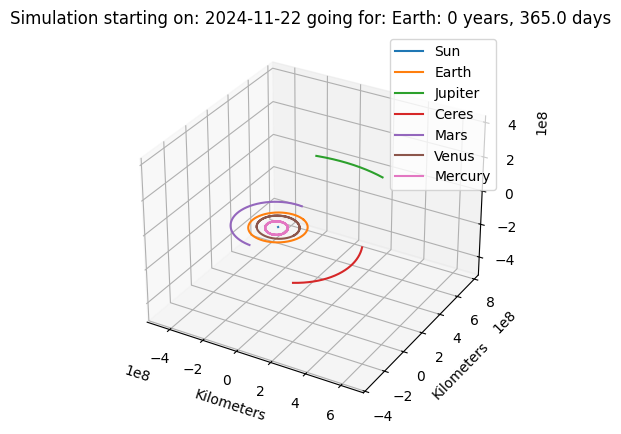

In [5]:

# from astroquery.jplhorizons import Horizons
import numpy as np
from datetime import datetime, timedelta

from mpl_toolkits.mplot3d import Axes3D

from Orbit_Helpers import *
# Create an instance of the NBodySim class
nbody_sim = NBodySim(['Sun', 'Earth','Jupiter','Ceres','Mars','Venus','Mercury'])

# Automatically uses today's date for the epoch
nbody_sim.query_jpl()

nbody_sim.Do_Simulation(365*24*3600,3600)
nbody_sim.Basic_Graphic()
nbody_sim.Three_Dim_Graphic()
# nbody_sim.Animated_Graph(8,0,"Inner_Solar_System")
# Animated_Graph(data3,len(masses2),-10**9,10**9,-10**9,10**9,8,500,"Inner Solar System")

{'Sun': {'position': array([0., 0., 0.]), 'velocity': array([0., 0., 0.])}, 'Mars': {'position': array([1.02130856e+06, 2.34677048e+08, 4.89263323e+06]), 'velocity': array([-23.31377832,   2.1640376 ,   0.61712463])}, 'Earth': {'position': array([ 7.42614398e+07,  1.27740447e+08, -7.93733983e+03]), 'velocity': array([-2.62301379e+01,  1.48673061e+01, -2.17720676e-06])}, 'Jupiter': {'position': array([ 2.02405699e+08,  7.30874133e+08, -7.56449103e+06]), 'velocity': array([-12.75490719,   4.10488017,   0.26829708])}}


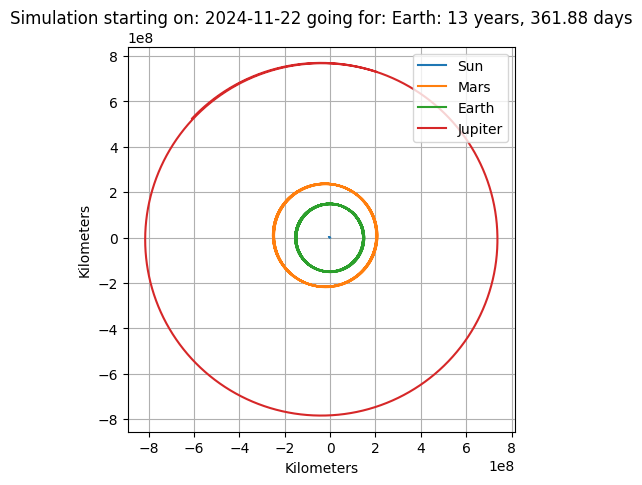

['Sun', 'Mars', 'Earth', 'Jupiter']
 is not in the list


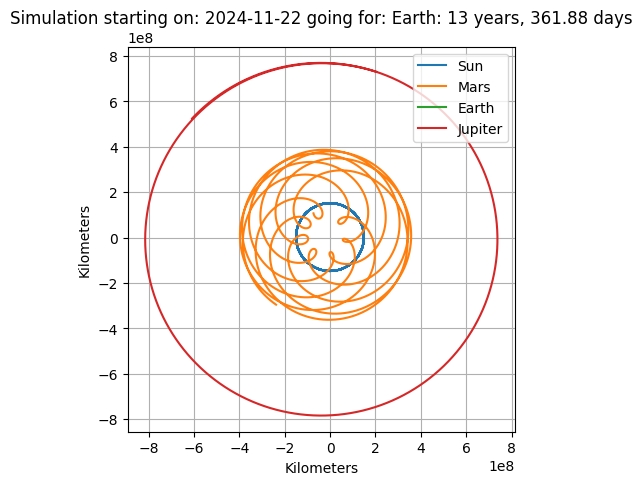

 is not in the list


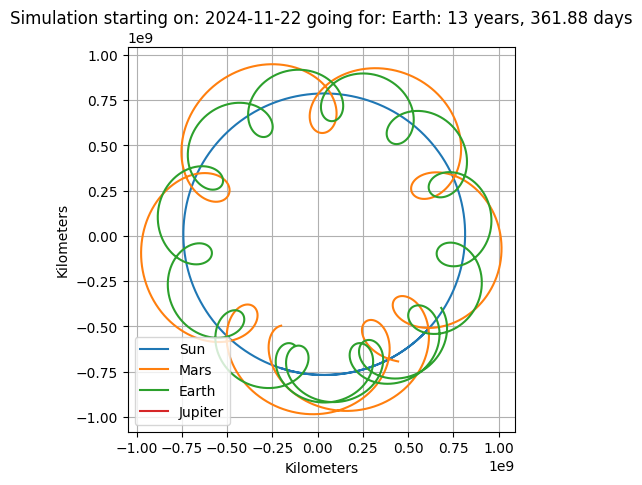

In [9]:
nbody_sim_2 = NBodySim(['Sun','Mars', 'Earth','Jupiter'])

# Automatically uses today's date for the epoch
nbody_sim_2.query_jpl()

nbody_sim_2.Do_Simulation(14*365*24*3600,3600)
nbody_sim_2.Basic_Graphic()
print(nbody_sim_2.names)
nbody_sim_2.set_focus('Earth')
nbody_sim_2.Basic_Graphic()
nbody_sim_2.set_focus('Jupiter')
nbody_sim_2.Basic_Graphic()
# nbody_sim_2.Animated_Graph(8,0,"Jupiter_Earth")

{'Sun': {'position': array([0., 0., 0.]), 'velocity': array([0., 0., 0.])}, 'Earth': {'position': array([ 7.42614398e+07,  1.27740447e+08, -7.93733983e+03]), 'velocity': array([-2.62301379e+01,  1.48673061e+01, -2.17720676e-06])}, 'Jupiter': {'position': array([ 2.02405699e+08,  7.30874133e+08, -7.56449103e+06]), 'velocity': array([-12.75490719,   4.10488017,   0.26829708])}}


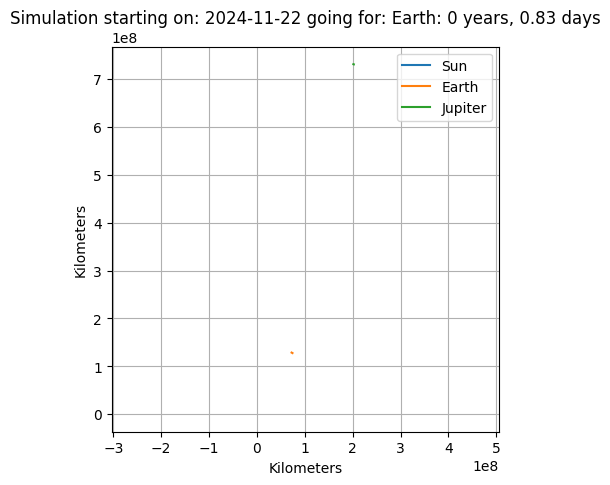

In [7]:

nbody_sim_3 = NBodySim(['Sun', 'Earth','Jupiter'])

# Automatically uses today's date for the epoch
nbody_sim_3.query_jpl()

nbody_sim_3.Do_RKF45_Simulation(20*3600,3600,1,0.9,1.1)
nbody_sim_3.Basic_Graphic()
# nbody_sim_3.Animated_Graph(8,0,"Jupiter_Earth")

In [8]:

# print(nbody_sim_3.simulation_data.head())
print(len(nbody_sim_3.simulation_data))
print(len(nbody_sim_3.simulation_data[0]))
print(len(nbody_sim_3.simulation_data[1]))
print(nbody_sim_3.simulation_data[1][-1])
print(nbody_sim_3.simulation_data[1][:50])

2
19
19
[4.8018739011559115e-06, 1.6179256615049213e-05, -1.5566080215659916e-07, -26.444127701081563, 14.493019305085289, 2.0696142347345835e-05, -12.75926397604372, 4.089109693567192, 0.2684600632284821, 0.17048332413885403, 0.573637721106897, -0.005522190207265306, 72393578.74449842, 128781583.01142241, -7936.683199760421, 201500966.09860104, 731164691.8118519, -7545457.614607677]
[[0.0, 0.0, 0.0, -26.230137913388138, 14.867306130270496, -2.1772067626963164e-06, -12.754907187372874, 4.104880169847875, 0.268297077592199, 0.0, 0.0, 0.0, 74261439.82289457, 127740446.8726758, -7937.339828260093, 202405698.72737354, 730874132.9086109, -7564491.025396318], [2.446008771361931e-07, 8.209602318646221e-07, -7.911583838784093e-09, -26.241129053917376, 14.848384527058691, -1.0163565729059154e-06, -12.755128830558329, 4.1040797306284365, 0.2683053614719143, 0.0004403088426215907, 0.001477718026566211, -1.4241172379764659e-05, 74166991.53823641, 127793935.1183723, -7937.345576682817, 202359780.66